In [48]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns

In [50]:
data = pd.read_csv("students_preprocessed.csv")
data

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,Peer_Influence,Physical_Activity,Learning_Disabilities,Exam_Score
0,0.504942,0.348375,-1.562146,1.288574,-1.214685,-0.019796,-0.143800,-1.302866,0.285825,-1.213934,-1.060721,-0.327233,1.070550,0.031411,-0.342867,67
1,-0.162822,-1.383736,-1.562146,-0.143488,-1.214685,0.661399,-1.116110,-1.302866,0.285825,0.411451,0.285971,-0.327233,-1.575587,1.001199,-0.342867,61
2,0.671882,1.560853,-0.124267,-0.143488,0.823259,-0.019796,1.106313,0.134442,0.285825,0.411451,0.285971,-0.327233,-0.252518,1.001199,-0.342867,74
3,1.506587,0.781403,-1.562146,-0.143488,0.823259,0.661399,1.592469,0.134442,0.285825,-0.401242,0.285971,-0.327233,-1.575587,1.001199,-0.342867,71
4,-0.162822,1.041220,-0.124267,-0.143488,0.823259,-0.700990,-0.699406,0.134442,0.285825,1.224144,0.285971,1.348757,-0.252518,1.001199,-0.342867,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,0.838823,-0.950708,1.313613,-0.143488,-1.214685,-0.019796,0.064552,0.134442,0.285825,-0.401242,1.632663,-0.327233,1.070550,-0.938377,-0.342867,68
6603,0.504942,-0.344469,1.313613,-0.143488,-1.214685,0.661399,0.411806,0.134442,0.285825,1.224144,-1.060721,1.348757,1.070550,-0.938377,-0.342867,69
6604,0.004119,0.868009,-0.124267,-1.575549,0.823259,-0.700990,-0.699406,-1.302866,0.285825,1.224144,-1.060721,-0.327233,-1.575587,-0.938377,-0.342867,68
6605,-1.665291,0.521587,1.313613,1.288574,0.823259,-0.700990,1.106313,1.571749,0.285825,0.411451,-1.060721,-0.327233,1.070550,0.031411,-0.342867,68


- Check for Correlation

In [53]:
correlation_matrix = data.corr()
print(correlation_matrix)

                            Hours_Studied  Attendance  Parental_Involvement  \
Hours_Studied                    1.000000   -0.009908             -0.016092   
Attendance                      -0.009908    1.000000             -0.009313   
Parental_Involvement            -0.016092   -0.009313              1.000000   
Access_to_Resources             -0.005452   -0.011508             -0.026557   
Extracurricular_Activities      -0.006017   -0.002222             -0.021881   
Sleep_Hours                      0.010977   -0.015918             -0.007945   
Previous_Scores                  0.024846   -0.020186             -0.021074   
Motivation_Level                -0.010396   -0.005010             -0.022393   
Internet_Access                  0.005038   -0.018318              0.012457   
Tutoring_Sessions               -0.014282    0.014324             -0.002107   
Family_Income                    0.000762   -0.012774              0.012383   
Teacher_Quality                 -0.003903   -0.00096

- Based on this correlation matrix,
- Hours Studied,
- Attendance,
- Parental Involvement,
- Access to Resource,
- Previous Scores,
- Tutoring Session
- is strong predictors

In [56]:
data_selected = data.copy()
data_selected

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,Peer_Influence,Physical_Activity,Learning_Disabilities,Exam_Score
0,0.504942,0.348375,-1.562146,1.288574,-1.214685,-0.019796,-0.143800,-1.302866,0.285825,-1.213934,-1.060721,-0.327233,1.070550,0.031411,-0.342867,67
1,-0.162822,-1.383736,-1.562146,-0.143488,-1.214685,0.661399,-1.116110,-1.302866,0.285825,0.411451,0.285971,-0.327233,-1.575587,1.001199,-0.342867,61
2,0.671882,1.560853,-0.124267,-0.143488,0.823259,-0.019796,1.106313,0.134442,0.285825,0.411451,0.285971,-0.327233,-0.252518,1.001199,-0.342867,74
3,1.506587,0.781403,-1.562146,-0.143488,0.823259,0.661399,1.592469,0.134442,0.285825,-0.401242,0.285971,-0.327233,-1.575587,1.001199,-0.342867,71
4,-0.162822,1.041220,-0.124267,-0.143488,0.823259,-0.700990,-0.699406,0.134442,0.285825,1.224144,0.285971,1.348757,-0.252518,1.001199,-0.342867,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,0.838823,-0.950708,1.313613,-0.143488,-1.214685,-0.019796,0.064552,0.134442,0.285825,-0.401242,1.632663,-0.327233,1.070550,-0.938377,-0.342867,68
6603,0.504942,-0.344469,1.313613,-0.143488,-1.214685,0.661399,0.411806,0.134442,0.285825,1.224144,-1.060721,1.348757,1.070550,-0.938377,-0.342867,69
6604,0.004119,0.868009,-0.124267,-1.575549,0.823259,-0.700990,-0.699406,-1.302866,0.285825,1.224144,-1.060721,-0.327233,-1.575587,-0.938377,-0.342867,68
6605,-1.665291,0.521587,1.313613,1.288574,0.823259,-0.700990,1.106313,1.571749,0.285825,0.411451,-1.060721,-0.327233,1.070550,0.031411,-0.342867,68


In [58]:
features_to_keep = [
    'Hours_Studied', 
    'Attendance', 
    'Parental_Involvement', 
    'Access_to_Resources', 
    'Previous_Scores', 
    'Tutoring_Sessions',
    'Exam_Score'
]
data_selected = data_selected[features_to_keep]

In [60]:
data_selected

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Previous_Scores,Tutoring_Sessions,Exam_Score
0,0.504942,0.348375,-1.562146,1.288574,-0.143800,-1.213934,67
1,-0.162822,-1.383736,-1.562146,-0.143488,-1.116110,0.411451,61
2,0.671882,1.560853,-0.124267,-0.143488,1.106313,0.411451,74
3,1.506587,0.781403,-1.562146,-0.143488,1.592469,-0.401242,71
4,-0.162822,1.041220,-0.124267,-0.143488,-0.699406,1.224144,70
...,...,...,...,...,...,...,...
6602,0.838823,-0.950708,1.313613,-0.143488,0.064552,-0.401242,68
6603,0.504942,-0.344469,1.313613,-0.143488,0.411806,1.224144,69
6604,0.004119,0.868009,-0.124267,-1.575549,-0.699406,1.224144,68
6605,-1.665291,0.521587,1.313613,1.288574,1.106313,0.411451,68


- Separate X & y

In [63]:
x1 = data_selected.drop(columns=['Exam_Score'])
y = data_selected['Exam_Score']                 

- Split the Datasets

In [66]:
# Perform the train-test split with adjusted ratios
X_train, X_temp, y_train, y_temp = train_test_split(x1, y, test_size=0.20, random_state=42)  # 80/20 from whole
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)  # 50/50 from 20 (10/10)

In [68]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define a neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', 
              loss='mean_squared_error', 
              metrics=['mae'])  # Mean Absolute Error


# Display the model architecture
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                448       
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 4,673
Trainable params: 4,673
Non-trainable params: 0
_________________________________________________________________


In [70]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=1,
    verbose=0,
    restore_best_weights=True
)

In [72]:
history = model.fit(X_train, y_train,
                    epochs=20,              # You can adjust the number of epochs
                    validation_data=(X_val, y_val),  # Validation data to monitor the model performance
                    batch_size=32,           # Adjust the batch size if needed
                    callbacks=[early_stopping],
                    verbose=2)               # Verbose 2 gives cleaner output

Epoch 1/20
166/166 - 0s - loss: 2313.8735 - mae: 43.2072 - val_loss: 130.5320 - val_mae: 8.9079
Epoch 2/20
166/166 - 0s - loss: 117.3213 - mae: 8.3996 - val_loss: 92.3246 - val_mae: 7.5976
Epoch 3/20
166/166 - 0s - loss: 91.5615 - mae: 7.4124 - val_loss: 74.2304 - val_mae: 6.8485
Epoch 4/20
166/166 - 0s - loss: 72.6929 - mae: 6.6250 - val_loss: 58.4785 - val_mae: 6.0991
Epoch 5/20
166/166 - 0s - loss: 56.2859 - mae: 5.8466 - val_loss: 43.4602 - val_mae: 5.2911
Epoch 6/20
166/166 - 0s - loss: 42.1205 - mae: 5.0351 - val_loss: 31.3259 - val_mae: 4.4635
Epoch 7/20
166/166 - 0s - loss: 30.0301 - mae: 4.2077 - val_loss: 21.4028 - val_mae: 3.6566
Epoch 8/20
166/166 - 0s - loss: 20.9340 - mae: 3.4229 - val_loss: 14.5125 - val_mae: 2.9275
Epoch 9/20
166/166 - 0s - loss: 14.9927 - mae: 2.7829 - val_loss: 10.2252 - val_mae: 2.3648
Epoch 10/20
166/166 - 0s - loss: 11.3631 - mae: 2.2939 - val_loss: 8.4212 - val_mae: 2.0618
Epoch 11/20
166/166 - 0s - loss: 9.3483 - mae: 1.9694 - val_loss: 6.4084 - 

- Try Predict the model

In [75]:
predictions = model.predict(X_test).flatten()  # Flatten to ensure it's a 1D array

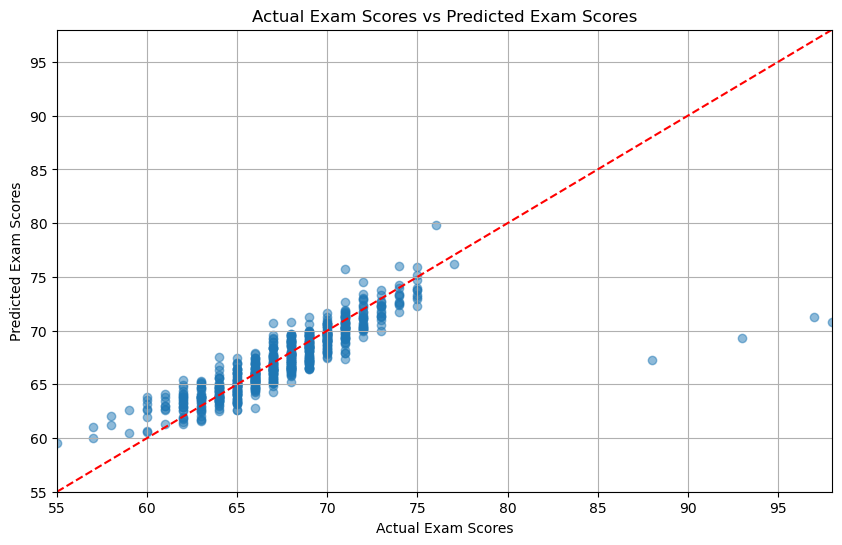

In [77]:
plt.figure(figsize=(10, 6))

# Scatter plot of actual vs predicted values
plt.scatter(y_test, predictions, alpha=0.5)

# Ideal line (y = x)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')

plt.title('Actual Exam Scores vs Predicted Exam Scores')
plt.xlabel('Actual Exam Scores')
plt.ylabel('Predicted Exam Scores')
plt.xlim(y_test.min(), y_test.max())
plt.ylim(y_test.min(), y_test.max())
plt.grid(True)
plt.show()


- Test Predict with Direct Input
- Unfortunately because of rigid nature of normalization, i'd have to import original data for determining caluclation for standard deviation & mean

In [80]:
data_prd = pd.read_csv("students_encoded.csv")

In [82]:
means = {
    'Hours_Studied': data_prd['Hours_Studied'].mean(),
    'Attendance': data_prd['Attendance'].mean(),
    'Parental_Involvement': data_prd['Parental_Involvement'].mean(),
    'Access_to_Resources': data_prd['Access_to_Resources'].mean(),
    'Previous_Scores': data_prd['Previous_Scores'].mean(),
    'Tutoring_Sessions': data_prd['Tutoring_Sessions'].mean()
}

std_devs = {
    'Hours_Studied': data_prd['Hours_Studied'].std(),
    'Attendance': data_prd['Attendance'].std(),
    'Parental_Involvement': data_prd['Parental_Involvement'].std(),
    'Access_to_Resources': data_prd['Access_to_Resources'].std(),
    'Previous_Scores': data_prd['Previous_Scores'].std(),
    'Tutoring_Sessions': data_prd['Tutoring_Sessions'].std()
}

In [84]:
data_prd['Previous_Scores'].min()


50

In [86]:
print(means)
print(std_devs)

{'Hours_Studied': 19.975329196306948, 'Attendance': 79.97744816104132, 'Parental_Involvement': 1.0864234902376269, 'Access_to_Resources': 1.1001967610110488, 'Previous_Scores': 75.07053125472983, 'Tutoring_Sessions': 1.4937187831088239}
{'Hours_Studied': 5.9905943365787415, 'Attendance': 11.547474961482814, 'Parental_Involvement': 0.6955213531086454, 'Access_to_Resources': 0.6983469240363511, 'Previous_Scores': 14.399784350759024, 'Tutoring_Sessions': 1.2305704213240194}


In [88]:
# Assuming you have a trained model named 'model'
def predict_exam_score(hours_studied, attendance, parental_involvement, access_to_resources,
                       previous_scores, tutoring_sessions):
    
    # Create a DataFrame to hold the input features
    input_data = pd.DataFrame({
        'Hours_Studied': [hours_studied],
        'Attendance': [attendance],
        'Parental_Involvement': [parental_involvement],
        'Access_to_Resources': [access_to_resources],
        'Previous_Scores': [previous_scores],
        'Tutoring_Sessions': [tutoring_sessions],
    })
    
    # If you normalized your input data, you need to apply the same normalization here.
    # For example, if you used Min-Max scaling:
    input_data_standardized = (input_data - pd.Series(means)) / pd.Series(std_devs)
    
    # Predict the exam score
    predicted_score = model.predict(input_data_standardized)  # Ensure input data is in the correct shape
    return predicted_score.flatten()[0]  # Return the predicted score as a scalar

In [90]:
# Example usage
predicted_score = predict_exam_score(37, 97, 2, 1, 50, 7)
print(f'Predicted Exam Score: {predicted_score}')

Predicted Exam Score: 84.25035858154297


In [92]:
model.save('student_score_model.h5')